In [30]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
from sklearn import linear_model

%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format

# Suppress annoying harmless error.
import warnings
warnings.filterwarnings(action="ignore", module="scipy", message="^internal gelsd")

In [57]:
df = pd.read_csv(r'C:\Users\harr1\Desktop\Thinkful\New York Crime.csv', dtype={'City':str})
print (df.head(7))
print (len(df))

                             Table 8  Unnamed: 1      Unnamed: 2  \
0                           NEW YORK         NaN             NaN   
1  Offenses Known to Law Enforcement         NaN             NaN   
2                      by City, 2013         NaN             NaN   
3                               City  Population  Violent\ncrime   
4                      Adams Village       1,861               0   
5           Addison Town and Village       2,577               3   
6                      Akron Village       2,846               3   

                               Unnamed: 3                    Unnamed: 4  \
0                                     NaN                           NaN   
1                                     NaN                           NaN   
2                                     NaN                           NaN   
3  Murder and\nnonnegligent\nmanslaughter  Rape\n(revised\ndefinition)1   
4                                       0                           NaN   
5    

In [439]:
# TO DO: cut first three lines. Replace nan with 0? Get rid of Unnamed 13. 

In [58]:
#Get rid of top three rows and last three
new_df = df.drop([0,1,2, 3, 354, 353, 352])

#assign row to column names
new_df.columns = df.iloc[3]
#Clean up column names so you can delete some useless columns that are just causing nan issues
new_df.columns = new_df.columns.str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('\n', '_').str.replace('-', '')
#Get rid of empty rape column
#modcrime= new_df.drop(['Rape_revised_definition1'], axis = 'columns') CAN USE THIS TOO
modcrime= new_df.drop([new_df.columns[4], new_df.columns[13]], axis = 'columns')
print (modcrime.head(10))



3                       City Population Violent_crime  \
4              Adams Village      1,861             0   
5   Addison Town and Village      2,577             3   
6              Akron Village      2,846             3   
7                     Albany     97,956           791   
8             Albion Village      6,388            23   
9             Alfred Village      4,089             5   
10          Allegany Village      1,781             3   
11              Amherst Town    118,296           107   
12        Amityville Village      9,519             9   
13                 Amsterdam     18,182            30   

3  Murder_and_nonnegligent_manslaughter Rape_legacy_definition2 Robbery  \
4                                     0                       0       0   
5                                     0                       0       0   
6                                     0                       0       0   
7                                     8                      30     227 

In [8]:
[modcrime['City'].unique()]
print (len(modcrime))


348


In [66]:
#convert str to int

modcrime['PopNum'] = modcrime['Population'].str.replace(',', '')
modcrime['PropertyNum'] = modcrime['Property_crime'].str.replace(',', '')
modcrime['RobberyNum'] = modcrime['Robbery'].str.replace(',', '')
modcrime['Larceny']= modcrime['Larceny_theft'].str.replace(',', '')
modcrime['Burg']= modcrime['Burglary'].str.replace(',', '')
modcrime['Aggas']= modcrime['Aggravated_assault'].str.replace(',', '')
print(modcrime['PopNum'])
print(modcrime['PropertyNum'])

4        1861
5        2577
6        2846
7       97956
8        6388
9        4089
10       1781
11     118296
12       9519
13      18182
14       2053
15       4523
16        658
17       2522
18      27270
19       3333
20       7473
21       5418
22      15374
23       5733
24      17627
25      34243
26      46304
27       1410
28      12001
29       1022
30       2325
31       2054
32       2065
33       2358
        ...  
322      3642
323       615
324     12195
325     61686
326     27980
327      6887
328     27940
329      3012
330      3453
331      5828
332      8392
333      5175
334     28179
335     10245
336      1862
337      4337
338     43777
339      1797
340      4574
341      1732
342     44821
343      2604
344     57559
345      3733
346      9141
347     10685
348       829
349      5931
350    199134
351     36643
Name: PopNum, Length: 348, dtype: object
4        12
5        24
6        16
7      4090
8       223
9        46
10       10
11     2118
12      2

In [67]:
modcrime.RobberyNum = pd.to_numeric(modcrime.RobberyNum, errors = 'coerce')
modcrime.PopNum = pd.to_numeric(modcrime.PopNum, errors='coerce')
modcrime.PropertyNum = pd.to_numeric(modcrime.PropertyNum, errors='coerce')
modcrime.Larceny = pd.to_numeric(modcrime.Larceny, errors='coerce')
modcrime.Burg = pd.to_numeric(modcrime.Burg, errors='coerce')
modcrime.Aggas = pd.to_numeric(modcrime.Aggas, errors='coerce')
print (modcrime.PopNum)

4        1861
5        2577
6        2846
7       97956
8        6388
9        4089
10       1781
11     118296
12       9519
13      18182
14       2053
15       4523
16        658
17       2522
18      27270
19       3333
20       7473
21       5418
22      15374
23       5733
24      17627
25      34243
26      46304
27       1410
28      12001
29       1022
30       2325
31       2054
32       2065
33       2358
        ...  
322      3642
323       615
324     12195
325     61686
326     27980
327      6887
328     27940
329      3012
330      3453
331      5828
332      8392
333      5175
334     28179
335     10245
336      1862
337      4337
338     43777
339      1797
340      4574
341      1732
342     44821
343      2604
344     57559
345      3733
346      9141
347     10685
348       829
349      5931
350    199134
351     36643
Name: PopNum, Length: 348, dtype: int64


In [68]:
#convert str to int for murder
modcrime['Murder'] = pd.to_numeric(modcrime.Murder_and_nonnegligent_manslaughter, errors='coerce')
print (modcrime['Murder'])

4      0
5      0
6      0
7      8
8      0
9      0
10     0
11     1
12     0
13     0
14     0
15     0
16     0
17     0
18     1
19     0
20     0
21     0
22     0
23     0
24     0
25     0
26     3
27     0
28     0
29     0
30     0
31     0
32     0
33     0
      ..
322    0
323    0
324    0
325    7
326    0
327    1
328    0
329    0
330    0
331    0
332    0
333    0
334    0
335    1
336    0
337    0
338    0
339    0
340    0
341    0
342    1
343    0
344    1
345    0
346    0
347    0
348    0
349    0
350    6
351    0
Name: Murder, Length: 348, dtype: int64


In [69]:
#create features Popsquared
modcrime['Population Squared']= (modcrime['PopNum'])**2

In [70]:
#create features murder or none

modcrime['Murder0'] = (modcrime['Murder'] == 0)
modcrime['Murder1'] = (modcrime['Murder'] != 0)
print(modcrime['Murder0'].head(5))
print(modcrime['Murder1'].head(5))

4     True
5     True
6     True
7    False
8     True
Name: Murder0, dtype: bool
4    False
5    False
6    False
7     True
8    False
Name: Murder1, dtype: bool


In [71]:
#create features Robbery

modcrime['Robbery0'] = (modcrime['RobberyNum'] == 0)
modcrime['Robbery1'] = (modcrime['RobberyNum'] != 0)
print(modcrime['Robbery0'].head(5))
print(modcrime['Robbery1'].head(5))

4     True
5     True
6     True
7    False
8    False
Name: Robbery0, dtype: bool
4    False
5    False
6    False
7     True
8     True
Name: Robbery1, dtype: bool


In [72]:
corrmat = modcrime.corr()
    
    # Make the correlation matrix.

print(corrmat)


3                   PopNum  PropertyNum  RobberyNum  Larceny   Burg  Aggas  \
3                                                                            
PopNum               1.000        0.996       0.998    0.998  0.971  0.999   
PropertyNum          0.996        1.000       0.998    1.000  0.987  0.998   
RobberyNum           0.998        0.998       1.000    0.999  0.980  1.000   
Larceny              0.998        1.000       0.999    1.000  0.983  0.999   
Burg                 0.971        0.987       0.980    0.983  1.000  0.976   
Aggas                0.999        0.998       1.000    0.999  0.976  1.000   
Murder               0.987        0.995       0.993    0.993  0.994  0.991   
Population Squared   0.998        0.991       0.996    0.994  0.959  0.997   
Murder0             -0.162       -0.191      -0.166   -0.183 -0.241 -0.164   
Murder1              0.162        0.191       0.166    0.183  0.241  0.164   
Robbery0            -0.064       -0.079      -0.058   -0.077 -0.

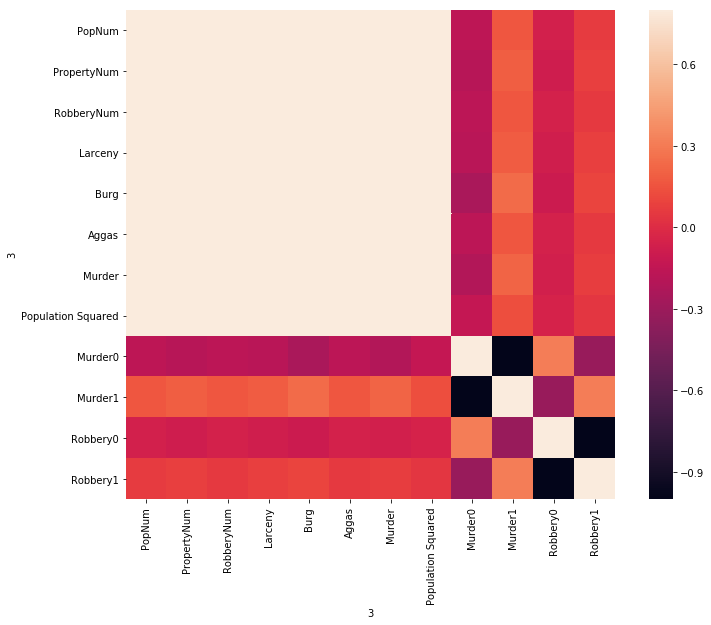

In [73]:
import seaborn as sns
# Set up the matplotlib figure.
f, ax = plt.subplots(figsize=(12, 9))


# Draw the heatmap using seaborn.
sns.heatmap(corrmat, vmax=.8, square=True)
plt.show()


In [84]:
# Instantiate and fit our model.
regr = linear_model.LinearRegression()
Y = modcrime['PropertyNum'].values.reshape(-1, 1)
X = modcrime[['Murder0', 'Robbery1', 'Burg']]
regr.fit(X, Y)

# Inspect the results.
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X, Y))


Coefficients: 
 [[1077.72913495  -56.41939728    8.2754668 ]]

Intercept: 
 [-1089.92973986]

R-squared:
0.9768176458979759


In [75]:
# Propertycrime = 𝛼+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2+𝑀𝑢𝑟𝑑𝑒𝑟+𝑅𝑜𝑏𝑏𝑒𝑟𝑦
# Propoertycrime = 390.36 + 223.43(Murder1) + 7.38(RobberyNum) + -223.43(Murder0) + -121.45(Robbery0) + 121.45(Robbery1).
# Obviously opposite correlation numbers for 0 vs 1, but if I take away those features it drops the R2 value to 0.3 from 
# 0.997

In [76]:
# so 𝑃𝑟𝑜𝑝𝑒𝑟𝑡𝑦𝑐𝑟𝑖𝑚𝑒=𝛼+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛+𝑃𝑜𝑝𝑢𝑙𝑎𝑡𝑖𝑜𝑛2+𝑀𝑢𝑟𝑑𝑒𝑟+𝑅𝑜𝑏𝑏𝑒𝑟𝑦
# Propertycrime = 24.14 + .0159(Population) + -1.01e-09(Population Squared) + .0118(Murder) + 2.09(Robbery) 

#So is this result showing that frequency of robbery is the most influential of these variables to predict property crime? 
#Seems legit. Makes sense with the higher rates of robbery compared to murder. I expected population to have more of an influence
#I am still very confused about building and using features. I definitely did not do it correctly
#R-squared variable too high, shows bias